STUDENT NAME: AKSHATHAA SA
TASK        : SALES PREDICTION USING PYTHON
DOMAIN      : DATA SCIENCE
AIM         : TO DEVELOP A MODEL THAT CAN PREDICT SALES USING FACTORS SUCH AS ADVERTISING EXPENDITURE ,TARGET AUDIENCE SEGMENTATION ,AND ADVERTISING PLATFLOM SELECTION.

# Import Libraries  
  

In [3]:
%pip install seaborn
%pip install pandas

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load the Dataset

In [5]:
task4 =pd.read_csv("advertising.csv")
task4

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
task4.to_string()

'        TV  Radio  Newspaper  Sales\n0    230.1   37.8       69.2   22.1\n1     44.5   39.3       45.1   10.4\n2     17.2   45.9       69.3   12.0\n3    151.5   41.3       58.5   16.5\n4    180.8   10.8       58.4   17.9\n5      8.7   48.9       75.0    7.2\n6     57.5   32.8       23.5   11.8\n7    120.2   19.6       11.6   13.2\n8      8.6    2.1        1.0    4.8\n9    199.8    2.6       21.2   15.6\n10    66.1    5.8       24.2   12.6\n11   214.7   24.0        4.0   17.4\n12    23.8   35.1       65.9    9.2\n13    97.5    7.6        7.2   13.7\n14   204.1   32.9       46.0   19.0\n15   195.4   47.7       52.9   22.4\n16    67.8   36.6      114.0   12.5\n17   281.4   39.6       55.8   24.4\n18    69.2   20.5       18.3   11.3\n19   147.3   23.9       19.1   14.6\n20   218.4   27.7       53.4   18.0\n21   237.4    5.1       23.5   17.5\n22    13.2   15.9       49.6    5.6\n23   228.3   16.9       26.2   20.5\n24    62.3   12.6       18.3    9.7\n25   262.9    3.5       19.5   17.0\n

# Data Preprocessing

In [7]:
task4.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [8]:
task4.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
task4.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
task4.shape

(200, 4)

In [11]:
task4.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

# Visualization 

AxesSubplot(0.125,0.11;0.775x0.77)


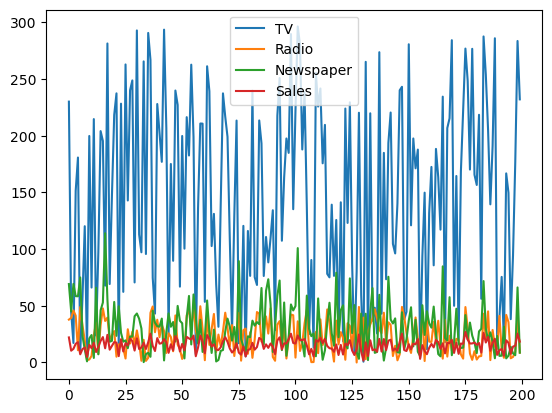

In [12]:
print(task4.plot())

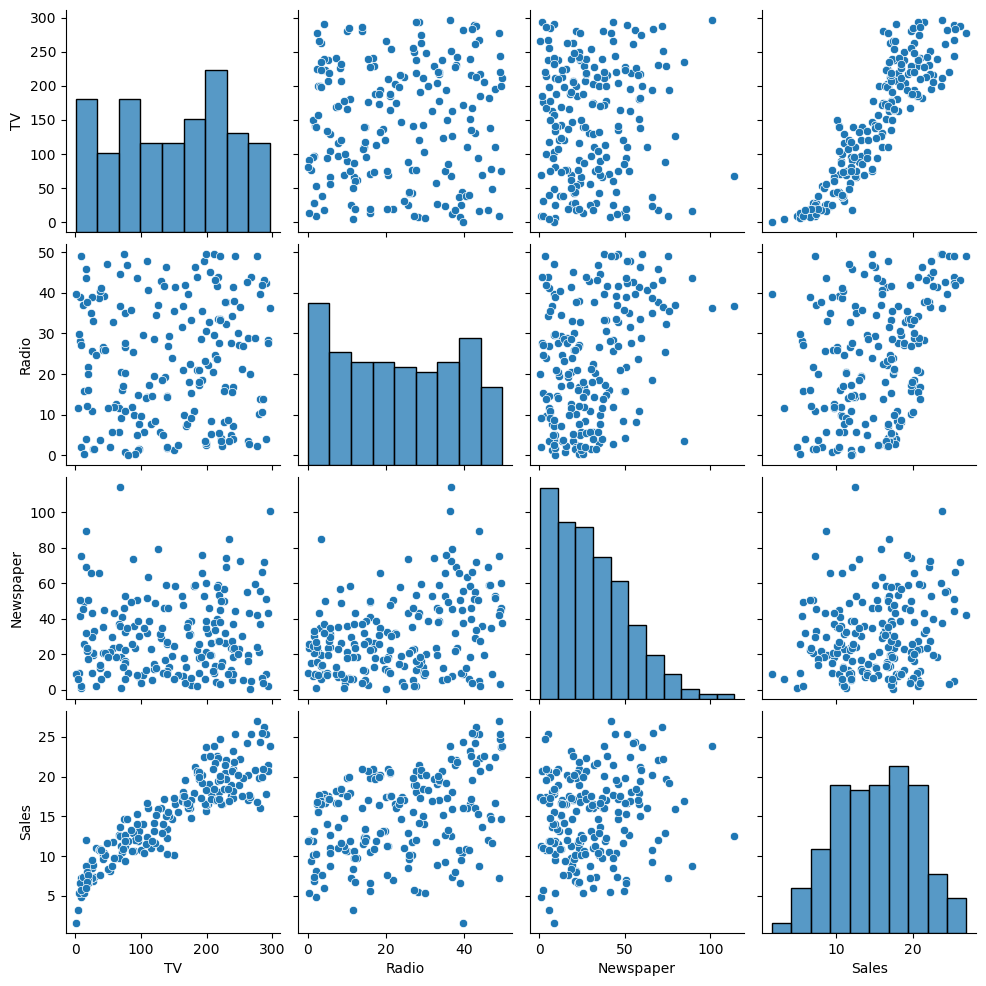

In [13]:
sns.pairplot(task4)
plt.show()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

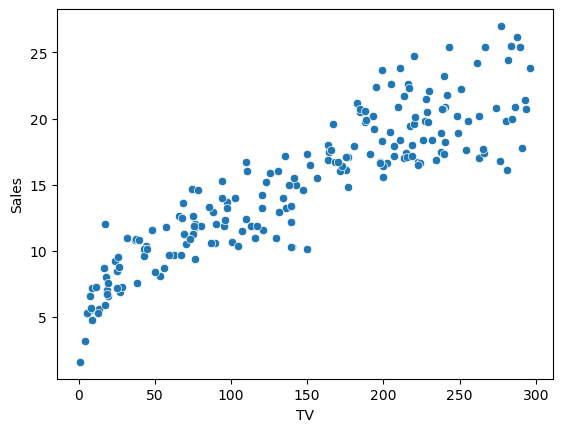

In [14]:
sns.scatterplot(x=task4["TV"],y=task4["Sales"])

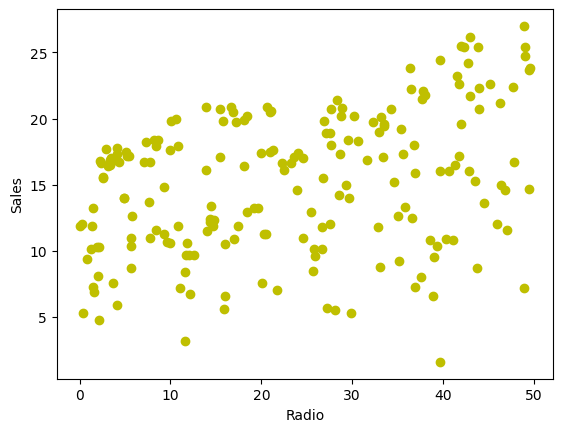

In [15]:
plt.scatter(task4["Radio"],task4["Sales"],color='y')
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

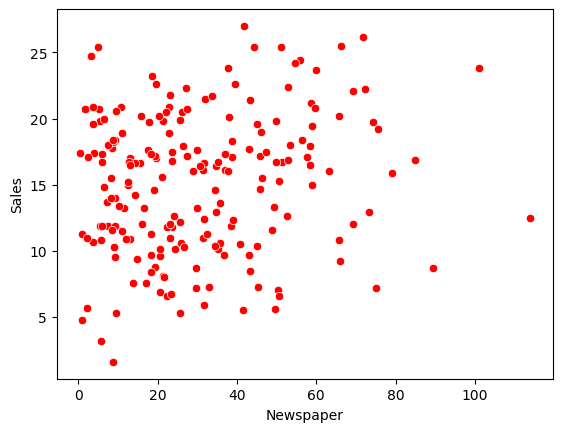

In [16]:
sns.scatterplot(x=task4["Newspaper"],y=task4["Sales"],color='r')
plt.show()

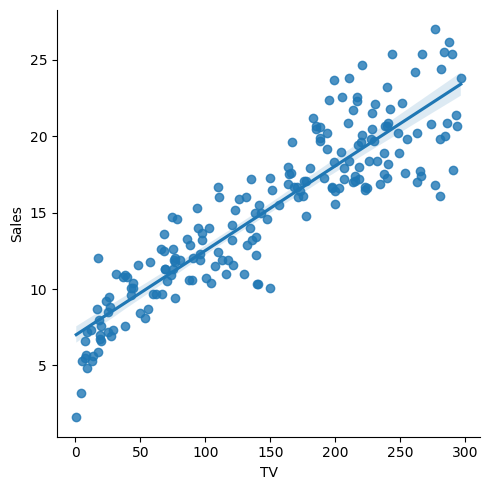

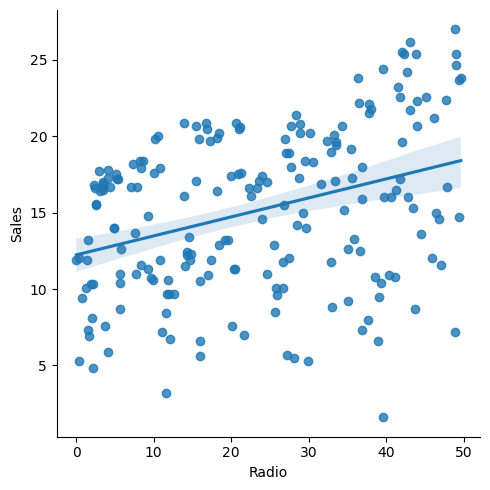

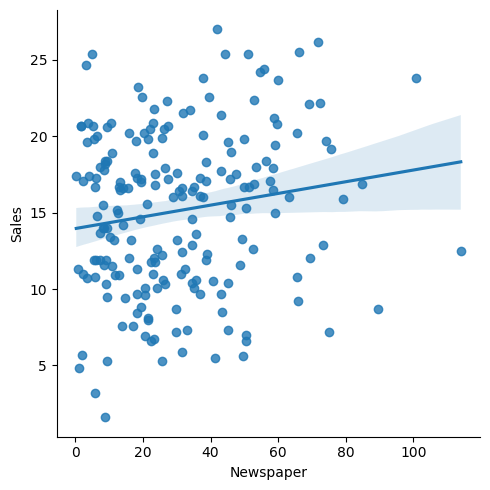

In [17]:
sns.lmplot(x='TV',y='Sales',data=task4)
sns.lmplot(x='Radio',y='Sales',data=task4)
sns.lmplot(x='Newspaper',y='Sales',data=task4)

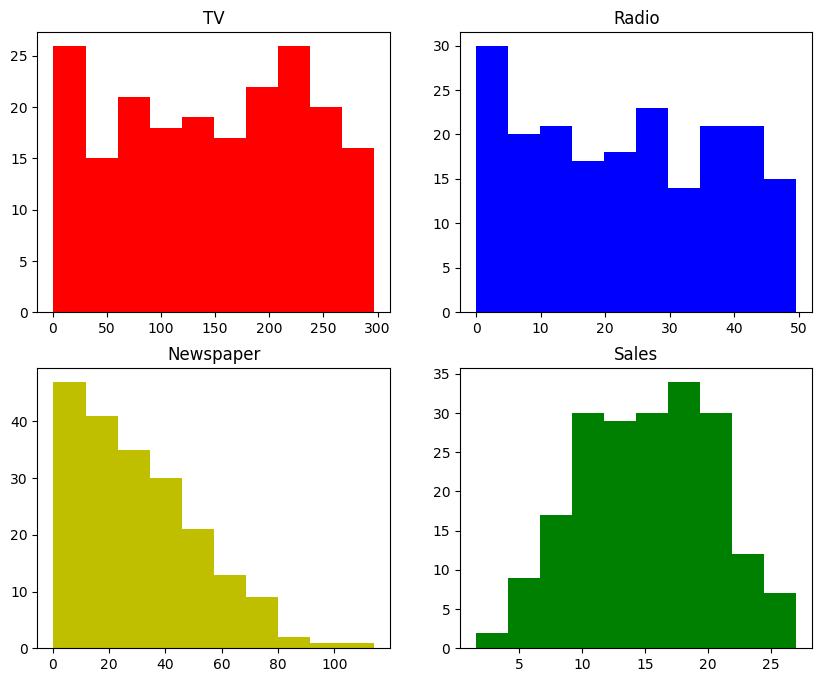

In [18]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.hist(task4['TV'],color='r')
plt.title('TV')

plt.subplot(222)
plt.hist(task4['Radio'],color='b')
plt.title('Radio')

plt.subplot(223)
plt.hist(task4['Newspaper'],color='y')
plt.title('Newspaper')

plt.subplot(224)
plt.hist(task4['Sales'],color='g')
plt.title('Sales')

plt.show()

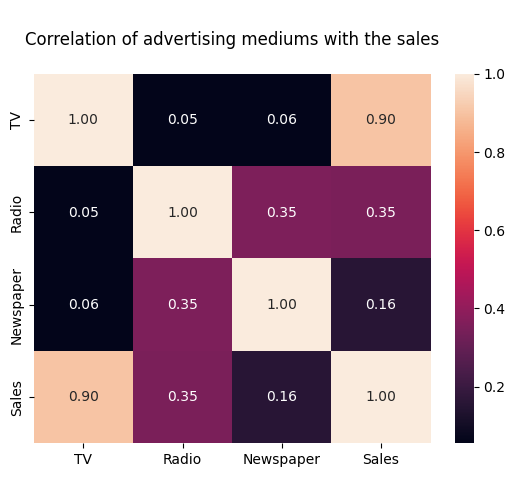

In [19]:
sns.heatmap(task4.corr(),annot=True,fmt='.2f')
plt.title("\nCorrelation of advertising mediums with the sales\n")
plt.show()


In [20]:
task4.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Training and Testing the Model

In [21]:
x=task4.drop('Sales', axis=1)
y=task4['Sales']
print(x)
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
print(x_train)
print(x_test)


        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]
        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
124  229.5   32.3  

In [24]:
print(y_train)
print(y_test)

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


In [25]:
ML=LinearRegression()
ML.fit(x_train,y_train)

LinearRegression()

In [26]:
x_train_prediction =ML.predict(x_train)
print(x_train_prediction)

[11.91465765 15.32881375  9.91093345  9.46132618 17.23412363  7.22972412
 10.35454191 15.23876611 11.14036535 11.71856758 13.85060866 14.66570876
 10.44983379  9.28550764  9.02357336 12.47875166 10.48712079 24.99748731
  7.88523289 15.8640533  21.30888748 17.00814942 12.79206695  9.84041429
 21.01070892  7.48343928 23.52204082  7.05636619 12.56968457 10.08676368
 11.1715446   9.12566707 16.92180225 17.90167068 15.63428805 18.26514616
 15.51584207 19.23176429 17.48701831 21.82555114 10.58560762 14.22101675
 10.75778538 18.10690693  9.94580615 17.38762989 13.21321157 23.7057409
 11.04124955 23.50498043  7.25377772 19.17388849 24.9725586  21.21199698
 18.85730214 16.49383903 13.90044002 11.26132856 19.58689909 15.32197517
 15.91287266 10.29394498 20.24916557 12.59260311 21.37507598 11.62060518
  9.00761916 19.44123849 15.85637182 18.5764323   9.57905955 21.37254028
 24.69974685 18.22258697 18.82367855 14.9707016  16.30608241  8.86438172
 17.37327271 21.11096152 18.14037337  5.57959415  6.

In [27]:
x_test_prediction = ML.predict(x_test)
print(x_test_prediction)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


In [28]:
accuracy = ML.score(x_test,y_test)*100
print("Accuarcy of sales prediction using LinearRegression is:",accuracy)

Accuarcy of sales prediction using LinearRegression is: 90.59011844150827


In [29]:
print(ML.coef_)
print(ML.intercept_)

[0.05450927 0.10094536 0.00433665]
4.714126402214136


# Visualization of Original Vs Pridicted Values

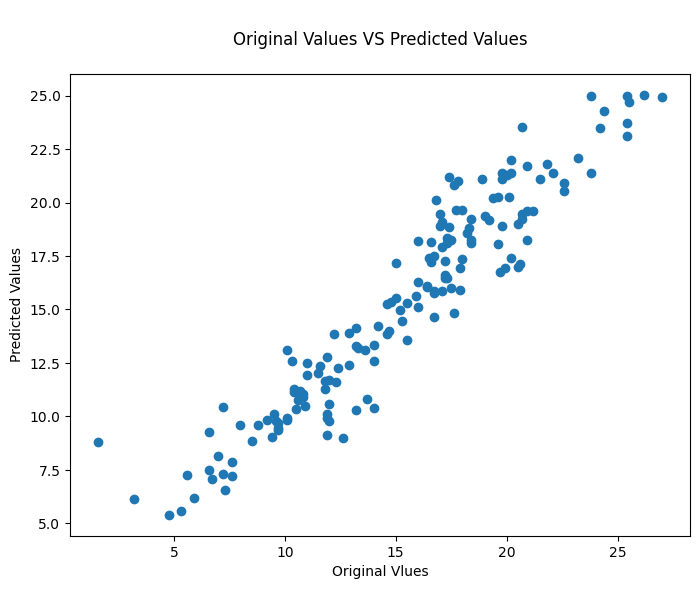

In [30]:
plt.figure(figsize=[8,6])
plt.scatter(y_train,x_train_prediction)
plt.xlabel("Original Vlues")
plt.ylabel("Predicted Values")
plt.title("\nOriginal Values VS Predicted Values\n")
plt.show()

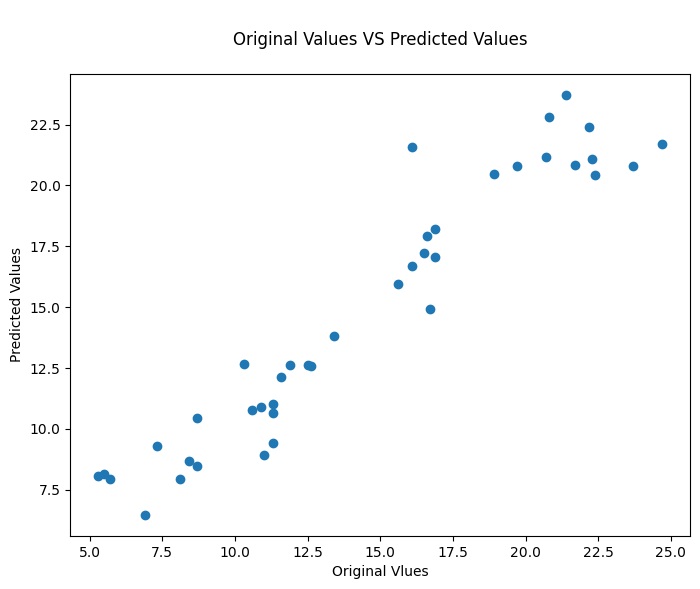

In [31]:
plt.figure(figsize=[8,6])
plt.scatter(y_test,x_test_prediction)
plt.xlabel("Original Vlues")
plt.ylabel("Predicted Values")
plt.title("\nOriginal Values VS Predicted Values\n")
plt.show()

# Make Predictions On New Data

In [32]:
import statsmodels.formula.api as sm
lin_model = sm.ols(formula="Sales ~ TV+Radio+Newspaper",data=task4).fit()
new_data =pd.DataFrame({'TV':[100],'Radio':[50],'Newspaper':[25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:",predicted_sales)


Predicted Sales: 0    15.428155
dtype: float64


In [33]:
new_data =pd.DataFrame({'TV':[25],'Radio':[55],'Newspaper':[78]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:",predicted_sales)


Predicted Sales: 0    11.897517
dtype: float64
